## Loading packages 

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
from pandas.core.frame import DataFrame as DF
from copy import copy as copy
import operator as operator
import pylab
import scipy.io as spi

# Show graphs in Notebook
%matplotlib inline

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
figsize(15, 15);

# Set up interface with R
import rpy2
%load_ext rpy2.ipython

/Users/Tomas/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


/Users/Tomas/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import IPython
print IPython.sys_info()

{'commit_hash': u'5c9c918',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/Users/Tomas/anaconda/lib/python2.7/site-packages/IPython',
 'ipython_version': '5.1.0',
 'os_name': 'posix',
 'platform': 'Darwin-15.6.0-x86_64-i386-64bit',
 'sys_executable': '/Users/Tomas/anaconda/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) \n[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]'}


In [5]:
!pip freeze

alabaster==0.7.9
anaconda-clean==1.0
anaconda-client==1.5.1
anaconda-navigator==1.3.1
appnope==0.1.0
appscript==1.0.1
argcomplete==1.0.0
astroid==1.4.7
astropy==1.2.1
Babel==2.3.4
backports-abc==0.4
backports.shutil-get-terminal-size==1.0.0
backports.ssl-match-hostname==3.4.0.2
beautifulsoup4==4.5.1
bitarray==0.8.1
blaze==0.10.1
bokeh==0.12.2
boto==2.42.0
Bottleneck==1.1.0
cdecimal==2.3
cffi==1.7.0
chest==0.2.3
click==6.6
cloudpickle==0.2.1
clyent==1.2.2
colorama==0.3.7
conda-build==2.0.2
configobj==5.0.6
configparser==3.5.0
contextlib2==0.5.3
cryptography==1.5
cycler==0.10.0
Cython==0.24.1
cytoolz==0.8.0
dask==0.11.0
datashape==0.5.2
decorator==4.0.10
dill==0.2.5
docutils==0.12
dynd==0.7.3.dev1
enum34==1.1.6
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==2.0.6
Flask==0.11.1
Flask-Cors==2.1.2
funcsigs==1.0.2
functools32==3.2.3.post2
futures==3.0.5
gevent==1.1.2
greenlet==0.4.10
grin==1.2.1
h5py==2.6.0
HDDM==0.6.0
HeapDict==1.0.0
idna==2.1
imagesize==0.7.1
ipaddress==1.0.16
ipykernel==4.5

### Loading R packages

In [6]:
%%R
require(lme4)
require(car)
require(gdata)

/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: lme4

  warnings.warn(x, RRuntimeWarning)
/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Matrix

  warnings.warn(x, RRuntimeWarning)
/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: car

  warnings.warn(x, RRuntimeWarning)
/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: gdata

  warnings.warn(x, RRuntimeWarning)
/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.

  warnings.warn(x, RRuntimeWarning)
/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 

  warnings.warn(x, RRu

In [7]:
%%R
sessionInfo()

R version 3.2.3 (2015-12-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.11.6 (El Capitan)

locale:
[1] en_GB.UTF-8/en_GB.UTF-8/en_GB.UTF-8/C/en_GB.UTF-8/en_GB.UTF-8

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gdata_2.17.0 car_2.1-0    lme4_1.1-12  Matrix_1.2-3

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.1        lattice_0.20-33    gtools_3.5.0       MASS_7.3-45       
 [5] grid_3.2.3         MatrixModels_0.4-1 nlme_3.1-124       SparseM_1.7       
 [9] minqa_1.2.4        nloptr_1.0.4       splines_3.2.3      pbkrtest_0.4-2    
[13] parallel_3.2.3     mgcv_1.8-9         nnet_7.3-11        quantreg_5.19     


## Loading and cleaning data

#### Loading the dataset

In [8]:
data_exp_1 = DF.from_csv('data/MyRawData.csv') #index_col=['Participant', 'Trial'])
data_exp_1.reset_index(inplace=True)

#### Loading control measures

In [9]:
# Loading the participantwise control measures
ControlData = DF.from_csv('data/control_data_exp1.csv')

In [10]:
ControlData.reset_index(inplace=True)

ControlData['Participant'] = ControlData['Participant ID'].map(lambda x: str(x)[:-2])
ControlData.columns

ControlData_B = ControlData[ControlData['Group'] == 'Bilingual'].copy()
ControlData_M = ControlData[ControlData['Group'] == 'Monolingual'].copy()

ControlData_B['Participant'] = ControlData_B['Participant'].astype(int)
ControlData_B.sort('Participant', inplace=True)
ControlData_B['Participant'] = np.arange(32, 63)
ControlData_M['Participant'] = ControlData_M['Participant'].astype(int)
ControlData_M.sort('Participant', inplace=True)
ControlData = pd.concat((ControlData_M, ControlData_B))

ControlData.set_index('Participant', inplace=True)
ControlData.head()

/Users/Tomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/Tomas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Participant ID,Group,WM,NVR,BVAT,Age
Participant,,,,,,
1,1_1,Monolingual,17,12,40,23.083
2,2_1,Monolingual,16,12,43,22.333
3,3_1,Monolingual,11,9,40,20.917
4,4_1,Monolingual,16,8,50,28.917
5,5_1,Monolingual,17,7,47,20.250


#### Generating a dataframe with participantwise means

In [11]:
data_exp_1.head()

,Participant,Trial,Group,Block,BlockPresentation,Correct,CorrectKey,Response,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,ConfidenceRT,Date,TimeStamp,TimeStamp+1,RTConf+1,expName
0,1,1,Monolingual,1,1,0.0,right,left,4.408616,3.0,53.0,50.0,0.60,0.973,2014_Nov_12_1312,211.632328,NaN,NaN,MetaDots
1,1,2,Monolingual,1,2,1.0,right,right,2.673370,4.0,54.0,50.0,0.50,0.456,2014_Nov_12_1312,215.278698,211.632328,0.973,MetaDots
2,1,3,Monolingual,1,3,0.0,right,left,3.291777,4.0,50.0,46.0,0.58,0.842,2014_Nov_12_1312,219.026475,215.278698,0.456,MetaDots
3,1,4,Monolingual,1,4,0.0,right,left,2.777241,5.0,55.0,50.0,0.54,1.036,2014_Nov_12_1312,222.645716,219.026475,0.842,MetaDots
4,1,5,Monolingual,1,5,1.0,left,left,2.860097,6.0,50.0,56.0,0.58,0.876,2014_Nov_12_1312,226.541812,222.645716,1.036,MetaDots


In [12]:
par_data_exp_1 = DF(data_exp_1.groupby(['Group','Participant']).mean())
par_data_exp_1.reset_index('Group', drop=False, inplace=True)
par_data_exp_1 = par_data_exp_1.sort_index()

In [13]:
data_exp_1['RT_MS'] = data_exp_1['RT']*1000
par_data_exp_1['RT_MS'] = par_data_exp_1['RT']*1000

## Functions for data analysis

In [14]:
# Cohen's D
def CohensD(DF, variable):
    cohensd = (DF[variable][DF['Group']=='Monolingual'].mean() - DF[variable][DF['Group']=='Bilingual'].mean()) / (sqrt((DF[variable][DF['Group']=='Monolingual'].std() ** 2 + DF[variable][DF['Group']=='Bilingual'].std() ** 2) / 2))
    return cohensd

# T-test
def QuickTtest(DF, variable):
    return stats.ttest_ind(DF[variable][DF['Group']=='Monolingual'], DF[variable][DF['Group']=='Bilingual'])

# T-test with D
def TtestD(DF, variable):
    output = np.array(QuickTtest(DF, variable))
    output = np.append(output, CohensD(DF, variable))
    output = [round(output[0], 2), round(output[1], 5), round(output[2], 2)]
    return output

In [15]:
def participant_zscore(data, old_var, sort_var):
    data2 = data.set_index(sort_var).copy()
    output = ((data2[old_var] - data2.groupby(level=sort_var)[old_var].mean())/
              data2.groupby(level=sort_var)[old_var].std())
    return output.values

In [16]:
def zscore(data, old_var):
    output = ((data[old_var] - data[old_var].mean())/
              data[old_var].std())
    return output.values

In [17]:
def BIC_bar(data, title='title'):
    
    # set figure-level properties
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig, top = plt.subplots()
    
    # determine variables
    BIC = data['BIC'].get_values()
    N = len(data['BIC'])
    ylims = [data['BIC'].min()-(np.absolute(data['BIC'].max()-data['BIC'].min())/10), data['BIC'].max()+(np.absolute(data['BIC'].max()-data['BIC'].min())/10)]
    ind = np.arange(N)  # the x locations for the groups
    width = 0.5      # the width of the bars

    # draw the bars
    rects1 = top.bar(ind, BIC, width, color='#5b7c99')

    # add some text for labels, title and axes ticks
    top.set_ylabel('BIC Scores')
    top.set_title(title)
    top.set_xticks(ind+width/2)
    top.set_xticklabels(data['Models'], rotation='vertical')
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    top.yaxis.set_major_formatter(y_formatter)
    
    # set the axis limits
    top.set_ylim(ylims)
    top.set_xlim([-0.5, N])
    
    # hide spines
    top.spines['top'].set_visible(False)
    top.spines['right'].set_visible(False)

## Demographics and control variables

### Demographics

In [18]:
CohensD(ControlData, 'Age')

-0.72772875077177956

In [19]:
%R -i ControlData

In [20]:
%%R
t.test(Age~Group, data=ControlData)


	Welch Two Sample t-test

data:  Age by Group
t = 2.8651, df = 57.968, p-value = 0.005799
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.8983212 5.0640659
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 25.25539                  22.27419 



## Control Measures

In [21]:
ControlData.rename(columns={'Working Memory' : 'WM', 'Nonverbal Reasoning' : 'NVR'}, inplace=True)

In [22]:
ControlData.groupby('Group').mean()

,WM,NVR,BVAT,Age
Group,,,,
Bilingual,16.032258,10.290323,36.935484,25.255387
Monolingual,17.903226,9.967742,42.419355,22.274194


In [23]:
ControlData.groupby('Group').std()

,WM,NVR,BVAT,Age
Group,,,,
Bilingual,3.728126,1.792457,5.988519,4.463613
Monolingual,4.826005,1.682931,7.783633,3.693233


In [24]:
CohensD(ControlData, 'WM')

0.43388296895644823

In [25]:
%R -i ControlData

In [26]:
%%R
t.test(WM~Group, data=ControlData)


	Welch Two Sample t-test

data:  WM by Group
t = -1.7082, df = 56.403, p-value = 0.0931
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.0647448  0.3228094
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 16.03226                  17.90323 



In [27]:
CohensD(ControlData, 'NVR')

-0.18554504358127344

In [28]:
%%R
t.test(NVR~Group, data=ControlData)


	Welch Two Sample t-test

data:  NVR by Group
t = 0.73049, df = 59.763, p-value = 0.4679
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5608108  1.2059721
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                10.290323                  9.967742 



### Add control variables to the main dataframe

In [29]:
data_exp_1.set_index('Participant', inplace=True)
data_exp_1['Age'] = ControlData['Age']
data_exp_1['WM'] = ControlData['WM']
data_exp_1.reset_index(inplace=True)

### Add control variables to the participantwise dataframe

In [30]:
par_data_exp_1['Age'] = ControlData['Age']
par_data_exp_1['WM'] = ControlData['WM']

## Group comparisons for Accuracy, Difficulty and Choice and Confidence RT

### Means

In [31]:
par_data_exp_1[['Group', 'Correct', 'DotDifference', 'RT', 'ConfidenceRT']].groupby('Group').mean().transpose()

Group,Bilingual,Monolingual
Correct,0.707903,0.709839
DotDifference,4.637742,4.335968
RT,2.679136,3.359697
ConfidenceRT,1.111708,1.179266


### Std

In [32]:
par_data_exp_1[['Group', 'Correct', 'DotDifference', 'RT', 'ConfidenceRT']].groupby('Group').std().transpose()

Group,Bilingual,Monolingual
Correct,0.012300,0.010605
DotDifference,1.034924,1.076827
RT,0.922995,1.474547
ConfidenceRT,0.275024,0.318261


### Accuracy

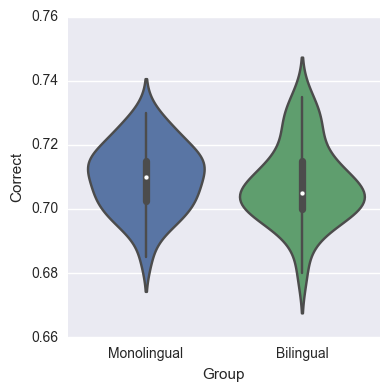

In [33]:
sns.factorplot(data=par_data_exp_1, x='Group', y='Correct', kind='violin')

In [34]:
par_data_exp_1.sort_values(by='Group', inplace=True)
par_data_exp_1['ZAccuracy'] = participant_zscore(par_data_exp_1, 'Correct', 'Group')
par_data_exp_1.sort_index(inplace=True)
par_data_exp_1.loc[par_data_exp_1['ZAccuracy'].abs()>3, :]

,Group,Trial,Block,BlockPresentation,Correct,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,ConfidenceRT,TimeStamp,TimeStamp+1,RTConf+1,RT_MS,Age,WM,ZAccuracy
Participant,,,,,,,,,,,,,,,,,,


No outliers for accuracy

In [35]:
CohensD(par_data_exp_1, 'Correct')

0.1685377743774695

In [36]:
%R -i par_data_exp_1

In [37]:
%%R
t.test(Correct~Group, data=par_data_exp_1)


	Welch Two Sample t-test

data:  Correct by Group
t = -0.66353, df = 58.728, p-value = 0.5096
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.007772819  0.003901851
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                0.7079032                 0.7098387 



### DotDifference

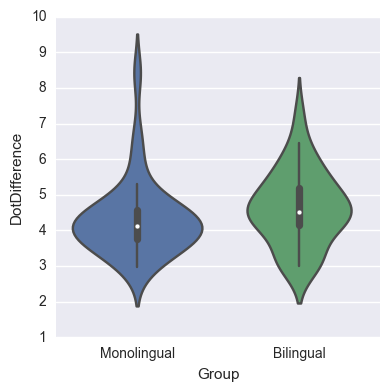

In [38]:
sns.factorplot(data=par_data_exp_1, x='Group', y='DotDifference', kind='violin')

In [39]:
par_data_exp_1.sort_values(by='Group', inplace=True)
par_data_exp_1['ZDotDif'] = participant_zscore(par_data_exp_1, 'DotDifference', 'Group')
par_data_exp_1.sort_index(inplace=True)
par_data_exp_1.loc[par_data_exp_1['ZDotDif'].abs()>3, :]

,Group,Trial,Block,BlockPresentation,Correct,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,ConfidenceRT,TimeStamp,TimeStamp+1,RTConf+1,RT_MS,Age,WM,ZAccuracy,ZDotDif
Participant,,,,,,,,,,,,,,,,,,,
9,Monolingual,100.5,4.5,13.0,0.7,2.216056,8.43,50.945,50.835,0.6119,1.188645,504.569361,502.838646,1.189276,2216.056375,19.583,25,-0.927713,3.801942


We note that participant 9 is an outlier, and cap the value at 3SD above the group mean.

In [40]:
CohensD(par_data_exp_1, 'DotDifference')

-0.28574848306436251

In [41]:
%%R
t.test(DotDifference~Group, data=par_data_exp_1)


	Welch Two Sample t-test

data:  DotDifference by Group
t = 1.125, df = 59.906, p-value = 0.2651
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2348139  0.8383623
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 4.637742                  4.335968 



### Dealing with outliers

In [42]:
par_data_exp_1.sort_index(inplace=True)
par_data_exp_1.loc[par_data_exp_1['ZDotDif']>3, :]

,Group,Trial,Block,BlockPresentation,Correct,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,ConfidenceRT,TimeStamp,TimeStamp+1,RTConf+1,RT_MS,Age,WM,ZAccuracy,ZDotDif
Participant,,,,,,,,,,,,,,,,,,,
9,Monolingual,100.5,4.5,13.0,0.7,2.216056,8.43,50.945,50.835,0.6119,1.188645,504.569361,502.838646,1.189276,2216.056375,19.583,25,-0.927713,3.801942


In [43]:
par_data_exp_1.loc[9, 'DotDifference'] = par_data_exp_1.loc[(par_data_exp_1['Group'] == 'Monolingual'), 'DotDifference'].mean() + (par_data_exp_1.loc[(par_data_exp_1['Group'] == 'Monolingual'), 'DotDifference'].std() *3)
par_data_exp_1.loc[9]

Group                Monolingual
Trial                      100.5
Block                        4.5
BlockPresentation             13
Correct                      0.7
RT                       2.21606
DotDifference            7.56645
DotNumberRight            50.945
DotNumberLeft             50.835
Confidence                0.6119
ConfidenceRT             1.18864
TimeStamp                504.569
TimeStamp+1              502.839
RTConf+1                 1.18928
RT_MS                    2216.06
Age                       19.583
WM                            25
ZAccuracy              -0.927713
ZDotDif                  3.80194
Name: 9, dtype: object

In [44]:
%R -i par_data_exp_1
%R result <- t.test(DotDifference ~ Group, data=par_data_exp_1)
%R -o result
print result
print CohensD(par_data_exp_1, 'DotDifference')


	Welch Two Sample t-test

data:  DotDifference by Group
t = 1.2916, df = 59.778, p-value = 0.2015
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1808903  0.8401517
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 4.637742                  4.308111 


-0.328077234841


### Response Time Confidence

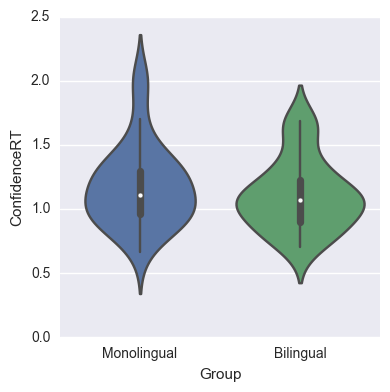

In [45]:
sns.factorplot(data=par_data_exp_1, x='Group', y='ConfidenceRT', kind='violin')

In [46]:
par_data_exp_1.sort_values(by='Group', inplace=True)
par_data_exp_1['ZConfidenceRT'] = participant_zscore(par_data_exp_1, 'ConfidenceRT', 'Group')
par_data_exp_1.sort_index(inplace=True)
par_data_exp_1.loc[par_data_exp_1['ZConfidenceRT'].abs()>3, :]

,Group,Trial,Block,BlockPresentation,Correct,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,ConfidenceRT,TimeStamp,TimeStamp+1,RTConf+1,RT_MS,Age,WM,ZAccuracy,ZDotDif,ZConfidenceRT
Participant,,,,,,,,,,,,,,,,,,,,


No outliers for confidence RT.

In [47]:
CohensD(par_data_exp_1, 'ConfidenceRT')

0.22713889425428901

In [48]:
%%R
t.test(ConfidenceRT~Group, data=par_data_exp_1)


	Welch Two Sample t-test

data:  ConfidenceRT by Group
t = -0.89425, df = 58.765, p-value = 0.3748
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.21873979  0.08362431
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 1.111708                  1.179266 



### Response Time Choice

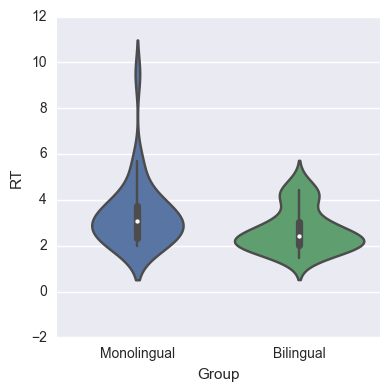

In [49]:
sns.factorplot(data=par_data_exp_1, x='Group', y='RT', kind='violin')

In [50]:
par_data_exp_1.sort_values(by='Group', inplace=True)
par_data_exp_1['ZRT'] = participant_zscore(par_data_exp_1, 'RT', 'Group')
par_data_exp_1.sort_index(inplace=True)
par_data_exp_1.loc[par_data_exp_1['ZRT'].abs()>3, :]

,Group,Trial,Block,BlockPresentation,Correct,RT,DotDifference,DotNumberRight,DotNumberLeft,Confidence,...,TimeStamp,TimeStamp+1,RTConf+1,RT_MS,Age,WM,ZAccuracy,ZDotDif,ZConfidenceRT,ZRT
Participant,,,,,,,,,,,,,,,,,,,,,
24,Monolingual,100.5,4.5,13.0,0.715,9.496715,3.955,49.67,49.925,0.5552,...,1705.016131,1699.714743,2.045462,9496.714533,27.667,29,0.486669,-0.353787,2.702777,4.161968


Participant 24 is an outlier.

In [51]:
CohensD(par_data_exp_1, 'RT')

0.55326462809414545

In [52]:
%%R
t.test(RT~Group, data=par_data_exp_1)


	Welch Two Sample t-test

data:  RT by Group
t = -2.1782, df = 50.38, p-value = 0.0341
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.30800101 -0.05312171
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 2.679136                  3.359697 



### Dealing with outliers

Participant 24 is an outlier, so let's trunctate the response time to 3 SD above the mean:

In [53]:
par_data_exp_1.loc[24, 'RT'] = par_data_exp_1.loc[(par_data_exp_1['Group'] == 'Monolingual'), 'RT'].mean() + (par_data_exp_1.loc[(par_data_exp_1['Group'] == 'Monolingual'), 'RT'].std() *3)
par_data_exp_1.loc[24]

Group                Monolingual
Trial                      100.5
Block                        4.5
BlockPresentation             13
Correct                    0.715
RT                       7.78334
DotDifference              3.955
DotNumberRight             49.67
DotNumberLeft             49.925
Confidence                0.5552
ConfidenceRT             2.03945
TimeStamp                1705.02
TimeStamp+1              1699.71
RTConf+1                 2.04546
RT_MS                    9496.71
Age                       27.667
WM                            29
ZAccuracy               0.486669
ZDotDif                -0.353787
ZConfidenceRT            2.70278
ZRT                      4.16197
Name: 24, dtype: object

In [54]:
CohensD(par_data_exp_1, 'RT')

0.5684576429081174

In [55]:
%R -i par_data_exp_1

In [56]:
%%R
t.test(RT~Group, data=par_data_exp_1)


	Welch Two Sample t-test

data:  RT by Group
t = -2.238, df = 55.169, p-value = 0.02928
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.18517222 -0.06541008
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                 2.679136                  3.304427 



## First Order Analysis with age and WM as control analysis

## Age

In [57]:
%%R
par_data_exp_1$Group = factor(par_data_exp_1$Group)
par_data_exp_1$Group <- relevel(par_data_exp_1$Group, ref="Monolingual")

print(summary(lm(Correct~Group + Age, data=par_data_exp_1)))
print(summary(lm(DotDifference~Group + Age, data=par_data_exp_1)))
print(summary(lm(ConfidenceRT~Group + Age, data=par_data_exp_1)))
print(summary(lm(RT~Group + Age, data=par_data_exp_1)))


Call:
lm(formula = Correct ~ Group + Age, data = par_data_exp_1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0229637 -0.0071239 -0.0008092  0.0070907  0.0218427 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.686702   0.007794  88.109  < 2e-16 ***
GroupBilingual -0.005032   0.002913  -1.727  0.08932 .  
Age             0.001039   0.000339   3.064  0.00329 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01076 on 59 degrees of freedom
Multiple R-squared:  0.1436,	Adjusted R-squared:  0.1145 
F-statistic: 4.946 on 2 and 59 DF,  p-value: 0.01033


Call:
lm(formula = DotDifference ~ Group + Age, data = par_data_exp_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7184 -0.5643 -0.1708  0.3727  3.1038 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.58721    0.71373   7.828 1.07e-10 ***
GroupBilingual  0.50083    0.26677  

## Working Memory

In [58]:
%%R
print(summary(lm(Correct~Group + WM, data=par_data_exp_1)))
print(summary(lm(DotDifference~Group + WM, data=par_data_exp_1)))
print(summary(lm(ConfidenceRT~Group + WM, data=par_data_exp_1)))
print(summary(lm(RT~Group + WM, data=par_data_exp_1)))


Call:
lm(formula = Correct ~ Group + WM, data = par_data_exp_1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027968 -0.007869 -0.001290  0.006523  0.027131 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.093e-01  6.546e-03 108.348   <2e-16 ***
GroupBilingual -1.874e-03  3.012e-03  -0.622    0.536    
WM              3.282e-05  3.467e-04   0.095    0.925    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01158 on 59 degrees of freedom
Multiple R-squared:  0.007435,	Adjusted R-squared:  -0.02621 
F-statistic: 0.221 on 2 and 59 DF,  p-value: 0.8024


Call:
lm(formula = DotDifference ~ Group + WM, data = par_data_exp_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5757 -0.5522 -0.1274  0.4307  3.3398 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.51373    0.57206   7.890 8.39e-11 ***
GroupBilingual  0.30814    0.26322   1.17

### MLM for response time choice

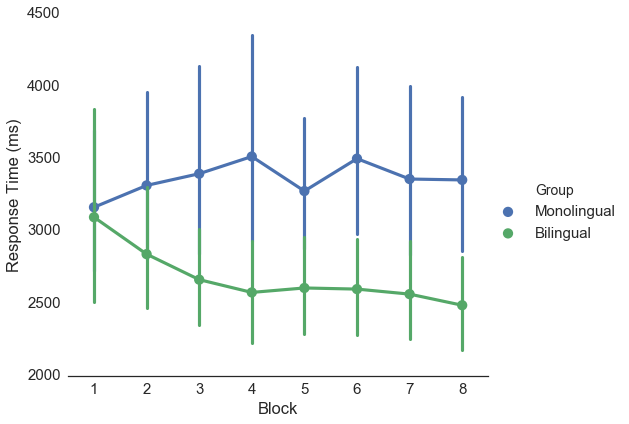

In [67]:
sns.set(style='white', font_scale=1.5)
g = sns.factorplot("Block", "RT_MS", data=data_exp_1, hue='Group', hue_order=['Monolingual', 'Bilingual'],
                   kind='point', size=6, aspect=1.2, units='Participant', jitter_x=.05).despine(left=True)
g.set(ylabel='Response Time (ms)', xlabel='Block')

#savefig("../Write-Up/Graphs/RT_Block_WriteUp2.png", dpi=300)

In [60]:
%R -i data_exp_1

### Basic Models

In [61]:
%%R
library(optimx)
data_exp_1$Group = factor(data_exp_1$Group) 
data_exp_1$Group <- relevel(data_exp_1$Group, ref="Monolingual")

Empty_RT = lmer(RT_MS ~ 1 + (1 | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))
Group_RT = lmer(RT_MS ~ Group + (1 | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))
Block_RT = lmer(RT_MS ~ Group + Block + Block:Group + (1 | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))
Block_RT_Random = lmer(RT_MS ~ Group + Block + Block:Group + (Block | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))


### Best fitting RT model

In [62]:
%%R
summary(Block_RT_Random)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: RT_MS ~ Group + Block + Block:Group + (Block | Participant)
   Data: data_exp_1
Control: lmerControl(optimizer = "optimx", optCtrl = list(method = "L-BFGS-B"))

      AIC       BIC    logLik  deviance  df.resid 
 224450.5  224509.9 -112217.2  224434.5     12392 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7898 -0.4276 -0.1639  0.2540 21.3528 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 Participant (Intercept) 2380701  1543.0        
             Block         26127   161.6   -0.65
 Residual                4116081  2028.8        
Number of obs: 12400, groups:  Participant, 62

Fixed effects:
                     Estimate Std. Error t value
(Intercept)           3273.16     282.88  11.571
GroupBilingual        -283.11     400.05  -0.708
Block                   19.23      31.13   0.618
GroupBilingual:Block   -88.32      44.03  -2.006

Correlation of Fixed Effects:
            (Int

In [63]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Block_RT_Random)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Block_RT_Random, fixef(Block_RT_Random))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

/Users/Tomas/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Note: method with signature ‘sparseMatrix#ANY’ chosen for function ‘kronecker’,
 target signature ‘dgCMatrix#ngCMatrix’.
 "ANY#sparseMatrix" would also be valid

  warnings.warn(x, RRuntimeWarning)


                       Estimate Std..Error    t.value    df.KR     confmax
(Intercept)          3273.15594  282.88049 11.5708083 64.03339 3827.601699
GroupBilingual       -283.11023  400.05343 -0.7076811 64.03339  500.994486
Block                  19.23134   31.13298  0.6177158 64.03339   80.251987
GroupBilingual:Block  -88.32247   44.02869 -2.0060210 64.03339   -2.026243
                         confmin       p.KR        p.z
(Intercept)           2718.71018 0.00000000 0.00000000
GroupBilingual       -1067.21494 0.48171125 0.47914335
Block                  -41.78931 0.53895339 0.53676267
GroupBilingual:Block  -174.61870 0.04908235 0.04485401


### Control_Models

In [64]:
%%R
library(optimx)

Block_RT_Random = lmer(RT_MS ~ Group + Block + Block:Group + (Block | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))
Block_RT_Random_Age = lmer(RT_MS ~ Group + Block + Age + Block:Group + (Block | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))
Block_RT_Random_WM = lmer(RT_MS ~ Group + Block + WM + Block:Group + (Block | Participant), data=data_exp_1, REML=FALSE, control=lmerControl(optimizer="optimx", optCtrl=list(method="L-BFGS-B")))

In [65]:
%%R
anova(Block_RT_Random, Block_RT_Random_Age)

Data: data_exp_1
Models:
Block_RT_Random: RT_MS ~ Group + Block + Block:Group + (Block | Participant)
Block_RT_Random_Age: RT_MS ~ Group + Block + Age + Block:Group + (Block | Participant)
                    Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Block_RT_Random      8 224450 224510 -112217   224434                         
Block_RT_Random_Age  9 224451 224518 -112217   224433 1.3489      1     0.2455


In [66]:
%%R
anova(Block_RT_Random, Block_RT_Random_WM)

Data: data_exp_1
Models:
Block_RT_Random: RT_MS ~ Group + Block + Block:Group + (Block | Participant)
Block_RT_Random_WM: RT_MS ~ Group + Block + WM + Block:Group + (Block | Participant)
                   Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
Block_RT_Random     8 224450 224510 -112217   224434                         
Block_RT_Random_WM  9 224452 224518 -112217   224434 0.9688      1      0.325


In [67]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Block_RT_Random_Age)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Block_RT_Random_Age, fixef(Block_RT_Random_Age))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

                       Estimate Std..Error    t.value    df.KR     confmax
(Intercept)          2308.54071  866.48166  2.6642696 72.94682 4006.844767
GroupBilingual       -412.21500  409.28113 -1.0071684 72.94682  389.976005
Block                  19.23134   31.13609  0.6176542 72.94682   80.258079
Age                    43.30640   36.83206  1.1757802 72.94682  115.497237
GroupBilingual:Block  -88.32247   44.03308 -2.0058207 72.94682   -2.017628
                         confmin        p.KR         p.z
(Intercept)            610.23666 0.009491387 0.007715571
GroupBilingual       -1214.40601 0.317183121 0.313853874
Block                  -41.79540 0.538726787 0.536803326
Age                    -28.88443 0.243505890 0.239682723
GroupBilingual:Block  -174.62732 0.048584466 0.044875379


In [68]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Block_RT_Random_WM)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Block_RT_Random_WM, fixef(Block_RT_Random_WM))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

                       Estimate Std..Error    t.value    df.KR     confmax
(Intercept)          2646.92318  687.48626  3.8501470 74.92897 3994.396251
GroupBilingual       -217.66608  400.47746 -0.5435164 74.92897  567.269745
Block                  19.23134   31.13391  0.6176974 74.92897   80.253808
WM                     34.97877   35.08713  0.9969117 74.92897  103.749536
GroupBilingual:Block  -88.32247   44.03000 -2.0059611 74.92897   -2.023668
                         confmin         p.KR          p.z
(Intercept)           1299.45011 0.0002466688 0.0001180469
GroupBilingual       -1002.60191 0.5883877362 0.5867742759
Block                  -41.79113 0.5386476747 0.5367748225
WM                     -33.79200 0.3220159872 0.3188073844
GroupBilingual:Block  -174.62128 0.0484704444 0.0448603965


### Model Comparisions

In [69]:
%%R
comparison1 = anova(Empty_RT, Group_RT, Block_RT, Block_RT_Random, Block_RT_Random_Age, Block_RT_Random_WM)
BIC1 = list(comparison1$BIC)

In [70]:
RT_models = ['Empty', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
RT_formulas = ['RT ~ 1', 'RT ~ Language Group', 'RT ~ Language Group + Block + Group*Block',
                   'RT ~ Language Group + Block + Group*Block (Block as a random variable)',
                  'RT ~ Language Group + Block + Age + Group*Block (Block as a random variable)',
                  'RT ~ Language Group + Block + WM + Group*Block (Block as a random variable)']
RT_Table = pd.DataFrame([RT_models, RT_formulas])
RT_Table = RT_Table.transpose(); RT_Table.columns = ['Models', 'Formulas']
RT_Table

,Models,Formulas
0,Empty,RT ~ 1
1,Model 1,RT ~ Language Group
2,Model 2,RT ~ Language Group + Block + Group*Block
3,Model 3,RT ~ Language Group + Block + Group*Block (Blo...
4,Model 4,RT ~ Language Group + Block + Age + Group*Bloc...
5,Model 5,RT ~ Language Group + Block + WM + Group*Block...


In [71]:
#RT_Table.to_csv('../Tables/RT_table.csv', index=False)

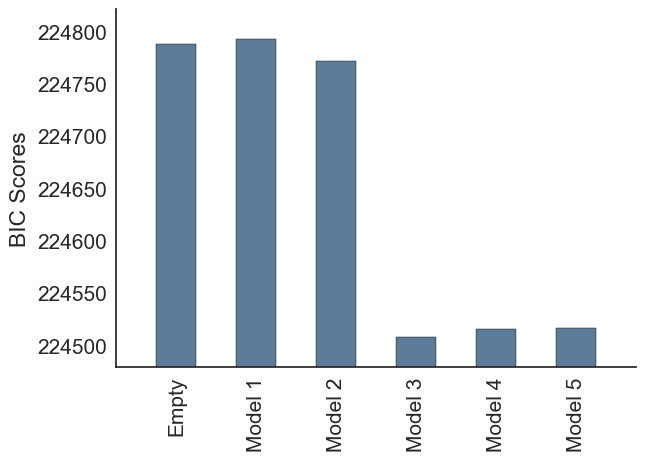

In [72]:
%R -o BIC1
BIC1 = np.array(BIC1); RT_Table['BIC'] = BIC1[0]
BIC_bar(RT_Table.copy().reset_index(drop=True), title='')
plt.gcf().subplots_adjust(bottom=0.25, left=0.25)
#plt.savefig('../Write-Up/Graphs/exp1_transitivity_models.png')

## Meta-D Analyses

In [105]:
Full = DF.from_csv('data/MetaD_Full_Data_Exp1.csv')
EaL = DF.from_csv('data/MetaD_Split_Data_Exp1.csv')

In [106]:
EaL['Half'] = np.repeat([1, 2], 62)
EaL.rename(columns={'Condition':'Group'}, inplace=True)

In [108]:
Full[['WM', 'Raven', 'BVAT']] = ControlData[['WM', 'NVR', 'BVAT']]
Full['Age'] = ControlData ['Age']
EaL['Age'] = ControlData ['Age']; EaL['WM']  = ControlData['WM']
Full.rename(columns={'Condition':'Group'}, inplace=True)
Full.head()

,Group,Da,MetaDa,Mratio,MratioLog,WM,Raven,BVAT,Age
Participant,,,,,,,,,
1,Monolingual,0.972673,0.433915,0.446106,-0.807199,17,12,40,23.083
2,Monolingual,1.135793,0.514078,0.452616,-0.792711,16,12,43,22.333
3,Monolingual,1.077151,0.622900,0.578285,-0.547689,11,9,40,20.917
4,Monolingual,1.068356,0.644793,0.603538,-0.504947,16,8,50,28.917
5,Monolingual,1.119841,0.575878,0.514249,-0.665047,17,7,47,20.250


### means 

In [109]:
Full.groupby('Group').mean()

,Da,MetaDa,Mratio,MratioLog,WM,Raven,BVAT,Age
Group,,,,,,,,
Bilingual,1.083094,0.533191,0.492195,-0.710882,16.032258,10.290323,36.935484,25.255387
Monolingual,1.071439,0.617980,0.577896,-0.559336,17.903226,9.967742,42.419355,22.274194


### stds

In [110]:
Full.groupby('Group').std()

,Da,MetaDa,Mratio,MratioLog,WM,Raven,BVAT,Age
Group,,,,,,,,
Bilingual,0.123882,0.068612,0.031707,0.064283,3.728126,1.792457,5.988519,4.463613
Monolingual,0.078354,0.096726,0.088319,0.149865,4.826005,1.682931,7.783633,3.693233


### t-test and cohen's d

In [270]:
CohensD(Full, 'Mratio')

1.2915821982969971

In [100]:
%R -i Full

In [101]:
%%R
t.test(Mratio ~ Group, Full)


	Welch Two Sample t-test

data:  Mratio by Group
t = -5.085, df = 37.607, p-value = 1.043e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.11983121 -0.05157043
sample estimates:
  mean in group Bilingual mean in group Monolingual 
                0.4921950                 0.5778959 



### BVAT Correlation for Bilinguals

In [266]:
Bilinguals = Full[Full['Group']=='Bilingual'].copy()

In [267]:
%R -i Bilinguals
%R results <- lm(Mratio ~ BVAT, data=Bilinguals)
%R print(summary(results))


Call:
lm(formula = Mratio ~ BVAT, data = Bilinguals)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049914 -0.021335 -0.001652  0.019628  0.064601 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.896e-01  3.677e-02  13.314 6.97e-14 ***
BVAT        7.087e-05  9.831e-04   0.072    0.943    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03225 on 29 degrees of freedom
Multiple R-squared:  0.0001792,	Adjusted R-squared:  -0.0343 
F-statistic: 0.005197 on 1 and 29 DF,  p-value: 0.943



## Mratio Analysis with age and WM as control analysis

### Age

In [102]:
%%R
Full$Group = factor(Full$Group)
Full$Group <- relevel(Full$Group, ref="Monolingual")

print(summary(lm(Mratio ~ Group + Age, data=Full)))


Call:
lm(formula = Mratio ~ Group + Age, data = Full)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.141059 -0.035679 -0.002934  0.028864  0.225752 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.531696   0.048084  11.058 5.20e-16 ***
GroupBilingual -0.091884   0.017972  -5.113 3.61e-06 ***
Age             0.002074   0.002091   0.992    0.325    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06636 on 59 degrees of freedom
Multiple R-squared:  0.3126,	Adjusted R-squared:  0.2893 
F-statistic: 13.42 on 2 and 59 DF,  p-value: 1.575e-05



### WM

In [104]:
%%R
print(summary(lm(Mratio ~ Group + WM, data=Full)))


Call:
lm(formula = Mratio ~ Group + WM, data = Full)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.149458 -0.040318 -0.001599  0.030791  0.203749 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.536471   0.037395  14.346  < 2e-16 ***
GroupBilingual -0.081372   0.017206  -4.729 1.45e-05 ***
WM              0.002314   0.001981   1.168    0.247    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06615 on 59 degrees of freedom
Multiple R-squared:  0.317,	Adjusted R-squared:  0.2938 
F-statistic: 13.69 on 2 and 59 DF,  p-value: 1.306e-05



## Mratio Time interaction

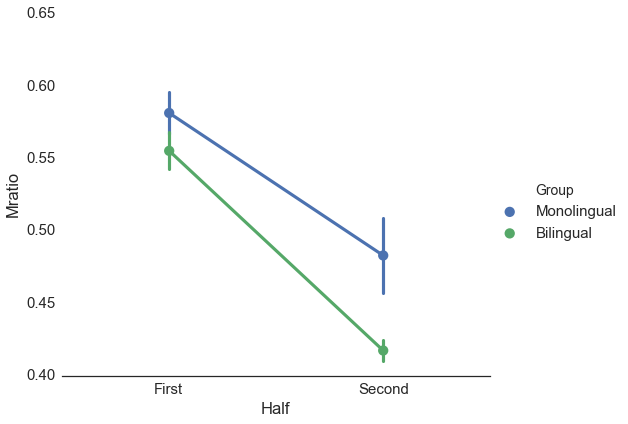

In [331]:
sns.set(style="white", font_scale=1.5)
g = sns.factorplot("Half", 'Mratio', hue='Group', hue_order=['Monolingual', 'Bilingual'],
                    data=EaL, kind="point", sharey=False, size=6, aspect=1.2).despine(left=True)
g.set(ylabel = 'Mratio',
      xlabel= 'Half', xticklabels = (['First', 'Second']))
savefig("../Write-Up/Graphs/Mratio_WriteUp2.png", dpi=300)

In [112]:
EaL.reset_index(inplace=True)
%R -i EaL

In [114]:
%%R
#Comparing my MLM model to an ANOVA for concurrent validity
EaL$Participant = factor(EaL$Participant)
EaL$Group = factor(EaL$Group)
EaL$Half = factor(EaL$Half)
EaL$Group <- relevel(EaL$Group, ref="Monolingual")

Baseline_D = lmer(Mratio ~ 1 + (1 | Participant), data=EaL, REML=FALSE)
Group_D = lmer(Mratio ~ Group + (1 | Participant), data=EaL, REML=FALSE)
Half_D = lmer(Mratio ~ Group + Half + (1 | Participant), data=EaL, REML=FALSE)
Interaction_D_Fixed = lmer(Mratio ~ Group + Half + Half:Group + (1 | Participant), data=EaL, REML=FALSE)

In [140]:
%%R
summary(Interaction_D_Fixed)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Mratio ~ Group + Half + Half:Group + (1 | Participant)
   Data: EaL

     AIC      BIC   logLik deviance df.resid 
  -397.7   -380.7    204.8   -409.7      118 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4374 -0.4685 -0.0787  0.4153  2.7539 

Random effects:
 Groups      Name        Variance  Std.Dev.
 Participant (Intercept) 0.0008156 0.02856 
 Residual                0.0014853 0.03854 
Number of obs: 124, groups:  Participant, 62

Fixed effects:
                      Estimate Std. Error t value
(Intercept)           0.581518   0.008615   67.50
GroupBilingual       -0.026147   0.012184   -2.15
Half2                -0.098401   0.009789  -10.05
GroupBilingual:Half2 -0.039507   0.013844   -2.85

Correlation of Fixed Effects:
            (Intr) GrpBln Half2 
GroupBilngl -0.707              
Half2       -0.568  0.402       
GrpBlngl:H2  0.402 -0.568 -0.707


In [313]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Interaction_D_Fixed)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Interaction_D_Fixed, fixef(Interaction_D_Fixed))
coefs$df.KR <-(rep(df.KR, each=4))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

                        Estimate  Std..Error    t.value    df.KR      confmax
(Intercept)           0.58151838 0.008615267  67.498592 123.6988  0.598404305
GroupBilingual       -0.02614706 0.012183827  -2.146046 123.6988 -0.002266754
Half2                -0.09840081 0.009789080 -10.052100 123.6988 -0.079214216
GroupBilingual:Half2 -0.03950686 0.013843849  -2.853748 123.6988 -0.012372914
                         confmin        p.KR         p.z
(Intercept)           0.56463246 0.000000000 0.000000000
GroupBilingual       -0.05002736 0.033822306 0.031869296
Half2                -0.11758741 0.000000000 0.000000000
GroupBilingual:Half2 -0.06664080 0.005067012 0.004320677


## Mratio Time Interaction Controls

## Mean RT Models

In [142]:
Full['MeanRT'] = par_data_exp_1['RT']*1000

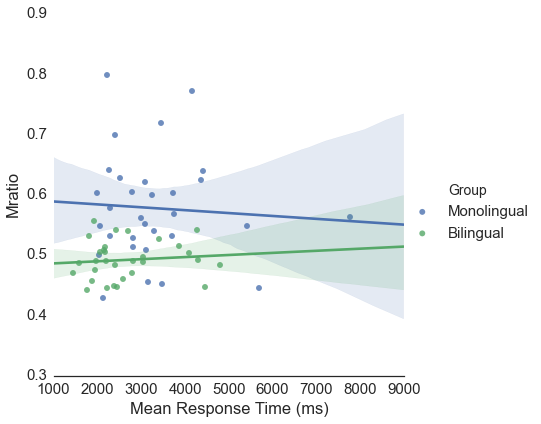

In [330]:
ax = sns.lmplot(data=Full, x='MeanRT', y='Mratio', hue='Group', size=6, aspect=1, scatter_kws={'s':35}).despine(left=True)
ax.set(ylabel = 'Mratio',
      xlabel= 'Mean Response Time (ms)')
savefig("../Write-Up/Graphs/Mratio_RT_WriteUp2.png", dpi=300)

In [143]:
%R -i Full

In [144]:
%%R
summary(lm(Mratio ~ Group + MeanRT + MeanRT*Group, data=Full))


Call:
lm(formula = Mratio ~ Group + MeanRT + MeanRT * Group, data = Full)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.153979 -0.036953 -0.003008  0.026591  0.215779 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.829e-01  3.767e-02  12.818   <2e-16 ***
GroupMonolingual         1.079e-01  4.847e-02   2.226   0.0299 *  
MeanRT                   3.478e-06  1.332e-05   0.261   0.7949    
GroupMonolingual:MeanRT -7.317e-06  1.571e-05  -0.466   0.6431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06733 on 58 degrees of freedom
Multiple R-squared:  0.3045,	Adjusted R-squared:  0.2686 
F-statistic: 8.465 on 3 and 58 DF,  p-value: 9.395e-05



In [145]:
%%R
summary(lm(Mratio ~ Group + Age + MeanRT + MeanRT*Group, data=Full))


Call:
lm(formula = Mratio ~ Group + Age + MeanRT + MeanRT * Group, 
    data = Full)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.146770 -0.037540 -0.000802  0.028255  0.220310 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.293e-01  6.377e-02   6.732  8.9e-09 ***
GroupMonolingual         1.160e-01  4.906e-02   2.365   0.0215 *  
Age                      2.239e-03  2.151e-03   1.041   0.3023    
MeanRT                   2.373e-06  1.335e-05   0.178   0.8595    
GroupMonolingual:MeanRT -7.520e-06  1.570e-05  -0.479   0.6338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06728 on 57 degrees of freedom
Multiple R-squared:  0.3175,	Adjusted R-squared:  0.2696 
F-statistic: 6.629 on 4 and 57 DF,  p-value: 0.0001879



In [146]:
%%R
summary(lm(Mratio ~ Group + WM + MeanRT + MeanRT*Group, data=Full))


Call:
lm(formula = Mratio ~ Group + WM + MeanRT + MeanRT * Group, data = Full)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156450 -0.040466 -0.003075  0.030478  0.195664 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.423e-01  4.958e-02   8.922 2.07e-12 ***
GroupMonolingual         1.090e-01  4.825e-02   2.258   0.0278 *  
WM                       2.544e-03  2.036e-03   1.250   0.2165    
MeanRT                   3.383e-06  1.325e-05   0.255   0.7994    
GroupMonolingual:MeanRT -9.023e-06  1.570e-05  -0.575   0.5676    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.067 on 57 degrees of freedom
Multiple R-squared:  0.3231,	Adjusted R-squared:  0.2756 
F-statistic: 6.801 on 4 and 57 DF,  p-value: 0.0001512



## Control Analyses

In [116]:
%%R
Interaction_D_Age = lmer(Mratio ~ Group + Age + Half + Half:Group + (1 | Participant), data=EaL, REML=FALSE)
Interaction_D_WM = lmer(Mratio ~ Group + WM + Half + Half:Group + (1 | Participant), data=EaL, REML=FALSE)

### Age

In [118]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Interaction_D_Age)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Interaction_D_Age, fixef(Interaction_D_Age))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

                         Estimate  Std..Error    t.value    df.KR      confmax
(Intercept)           0.547545379 0.028673891  19.095608 71.52867  0.603746206
GroupBilingual       -0.030694026 0.012626506  -2.430920 71.52867 -0.005946074
Age                   0.001525218 0.001228834   1.241191 71.52867  0.003933734
Half2                -0.098400813 0.009789080 -10.052100 71.52867 -0.079214216
GroupBilingual:Half2 -0.039506859 0.013843850  -2.853748 71.52867 -0.012372914
                           confmin         p.KR         p.z
(Intercept)           0.4913445528 0.000000e+00 0.000000000
GroupBilingual       -0.0554419786 1.756879e-02 0.015060542
Age                  -0.0008832975 2.185904e-01 0.214535270
Half2                -0.1175874092 2.664535e-15 0.000000000
GroupBilingual:Half2 -0.0666408043 5.647528e-03 0.004320678


### Working Memory

In [119]:
%%R
# Package for approximating degrees of freedom for the fixed effects in MLM
library(pbkrtest)

# get the coefficients for the best fitting model
coefs <- data.frame(coef(summary(Interaction_D_WM)))

# Use the Kenward-Roger approximation to get approximate degrees of freedom
df.KR <- get_ddf_Lb(Interaction_D_WM, fixef(Interaction_D_WM))
coefs$df.KR <-(rep(df.KR, each=5))

# Calculate confidence intervals from the estimates and the standard errors
coefs$confmax <- coefs$Estimate + (coefs$Std..Error * 1.96)
coefs$confmin <- coefs$Estimate - (coefs$Std..Error * 1.96)

# get p-values from the t-distribution using the t-values and approximated
# degrees of freedom
coefs$p.KR <- 2 * (1 - pt(abs(coefs$t.value), df.KR))

# use normal distribution to approximate p-value (tends to be anti-conservative with small sample sizes)
coefs$p.z <- 2 * (1 - pnorm(abs(coefs$t.value)))

print(coefs)

                         Estimate  Std..Error     t.value    df.KR
(Intercept)           0.563355874 0.022715183  24.8008513 74.92942
GroupBilingual       -0.024248992 0.012332147  -1.9663236 74.92942
WM                    0.001014482 0.001174772   0.8635566 74.92942
Half2                -0.098400813 0.009789080 -10.0521003 74.92942
GroupBilingual:Half2 -0.039506859 0.013843850  -2.8537481 74.92942
                           confmax      confmin         p.KR         p.z
(Intercept)           0.6078776323  0.518834115 0.000000e+00 0.000000000
GroupBilingual       -0.0000779832 -0.048420000 5.296541e-02 0.049261246
WM                    0.0033170364 -0.001288072 3.905874e-01 0.387831535
Half2                -0.0792142161 -0.117587409 1.554312e-15 0.000000000
GroupBilingual:Half2 -0.0123729142 -0.066640804 5.583615e-03 0.004320678


### Model Comparison

In [123]:
%%R
comparison2 = anova(Baseline_D, Group_D, Half_D, Interaction_D_Fixed, Interaction_D_Age, Interaction_D_WM)
BIC2 = list(comparison2$BIC)

In [125]:
Mratio_models = ['Empty', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']
Mratio_formulas = ['Mratio ~ 1', 'Mratio ~ Language Group', 'Mratio ~ Language Group + Half',
                   'Mratio ~ Language Group + Half + Group*Half',
                  'Mratio ~ Language Group + Half + Age + Group*Half',
                  'Mratio ~ Language Group + Half + WM + Group*Half']
Mratio_Table = pd.DataFrame([Mratio_models, Mratio_formulas])
Mratio_Table = Mratio_Table.transpose(); Mratio_Table.columns = ['Models', 'Formulas']
Mratio_Table

,Models,Formulas
0,Empty,Mratio ~ 1
1,Model 1,Mratio ~ Language Group
2,Model 2,Mratio ~ Language Group + Half
3,Model 3,Mratio ~ Language Group + Half + Group*Half
4,Model 4,Mratio ~ Language Group + Half + Age + Group*Half
5,Model 5,Mratio ~ Language Group + Half + WM + Group*Half


In [126]:
Mratio_Table.to_csv('../Tables/Mratio_table.csv', index=False)

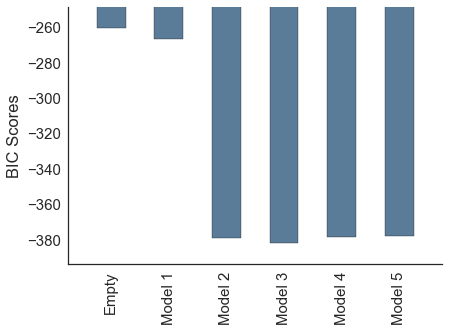

In [139]:
%R -o BIC2
BIC2 = np.array(BIC2); Mratio_Table['BIC'] = BIC2[0]
BIC_bar(Mratio_Table.copy().reset_index(drop=True), title='')
plt.gcf().subplots_adjust(bottom=0.25, left=0.25)
plt.savefig('../Write-Up/Graphs/exp1_mratio_models.png')

### Grey Scale Images

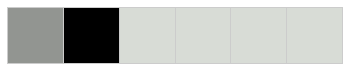

In [43]:
greyscale = ['#929591', '#000000', '#d8dcd6', '#d8dcd6', '#d8dcd6', '#d8dcd6']
sns.palplot(sns.color_palette(greyscale))

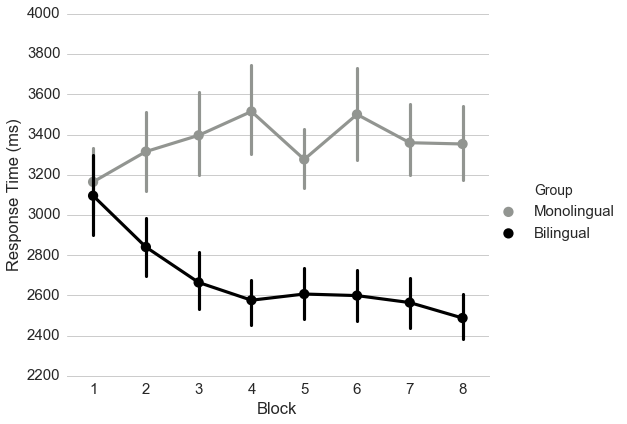

In [44]:
sns.set(style="whitegrid")
sns.set(style="whitegrid", font_scale=1.5)
g = sns.factorplot("Block", "RT_MS", data=data_exp_1, palette=greyscale, hue='Group', hue_order=['Monolingual', 'Bilingual'], kind='point', size=6, aspect=1.2).despine(left=True)
g.set(ylabel='Response Time (ms)', xlabel='Block')

savefig("Graphs/RT_Block_WriteUp_Grey.png", dpi=300)